In [45]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ecit import *


def ecit_simu_alpha(n_list=[100, 200, 500, 1000, 2000, 4000],
              t = 100,
              cit = kcit,
              k = 5,
              ensembles=[p_alpha2, p_alpha175, p_alpha15, p_alpha125, p_alpha1, p_alpha075, p_alpha05],
              show_progress=True):
    
    results = []

    for n in n_list:

        eI = [0] * len(ensembles)
        eII = [0] * len(ensembles)
        tim = 0
        start_time = time.time()
        iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)

        for sed in iteration_loop:
            #np.random.seed(sed)
            #random.seed(sed)
            dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3)))
            dataII = np.hstack((generate_samples(n=n,indp='Nc',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3)))

            obj_ECIT = ECIT(dataI, cit, ensembles[0], k)
            _, pI_list = obj_ECIT([0], [1], [2], return_p_list=True)
            obj_ECIT = ECIT(dataII, cit, ensembles[0], k)
            _, pII_list = obj_ECIT([0], [1], [2], return_p_list=True)

            for j, ensfunc in enumerate(ensembles):
                pI = ensfunc(pI_list)
                pII = ensfunc(pII_list)
                if pI<0.05:
                    eI[j] += 1
                if pII>0.05:
                    eII[j] += 1
    

        end_time = time.time()
        tim = end_time - start_time
        eI = [count / t for count in eI]
        eII = [count / t for count in eII]

        results.append({
            'n': n,
            'eI': eI,
            'eII': eII,
            'tim': tim
        })

    final_results = []
    for j in range(len(ensembles)):
        result_array = np.array([
            [re['eI'][j] for re in results],
            [re['eII'][j] for re in results],
            [re['tim'] for re in results]
        ])
        final_results.append(result_array)

    return final_results




def show_results_k(results, ensembles_name, n_list):
    dir = {}
    for ensemble_name, result in zip(ensembles_name, results):
        key_name = ensemble_name
        dir[key_name] = result

    fig, axes = plt.subplots(1, 3, figsize=(16, 4), dpi=500, sharex=True)
    ax_eI, ax_eII, ax_eSum = axes

    colors = cm.viridis(np.linspace(0.25, 0.85, len(results)))

    for (label, result), color in zip(dir.items(), colors):
        eI, eII, _ = result
        eSum = eI + eII

        ax_eI.plot(n_list, eI, label=label, color=color)
        ax_eII.plot(n_list, eII, color=color)
        ax_eSum.plot(n_list, eSum, color=color)

    ax_eI.set_ylabel("Error Rate")
    ax_eI.set_title("Type I Error")
    #ax_eI.set_xlabel("Sample Size (n)")
    
    ax_eII.set_title("Type II Error")
    #ax_eII.set_xlabel("Sample Size (n)")

    ax_eSum.set_title("Total Error Rate")
    #ax_eSum.set_xlabel("Sample Size (n)")

    fig.supxlabel("Sample Size (n)", fontsize=11)
    fig.legend(loc='upper center', bbox_to_anchor=(0.51, -0.05), ncol=7, fontsize=10)

    ax_eI.set_xticks(n_list)
    ax_eII.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

In [46]:
n_list=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

ensembles=[p_alpha2, p_alpha175, p_alpha15, p_alpha125, p_alpha1, p_alpha075, p_alpha05]
ensembles_name = ['alpha = 2.0 (Gaussian)', 'alpha = 1.75', 'alpha = 1.5', 'alpha = 1.25', 'alpha = 1.0 (Cauchy)',  'alpha = 0.75', 'alpha = 0.5']
#ensembles=[p_gaussian, p_alpha15, p_cauchy, p_alpha05]
#ensembles_name = ['alpha = 2.0 (Gaussian)', 'alpha = 1.5', 'alpha = 1.0 (Cauchy)', 'alpha = 0.5']

k = 5
t = 100

n=2500: 100%|██████████| 20/20 [00:54<00:00,  2.72s/it]


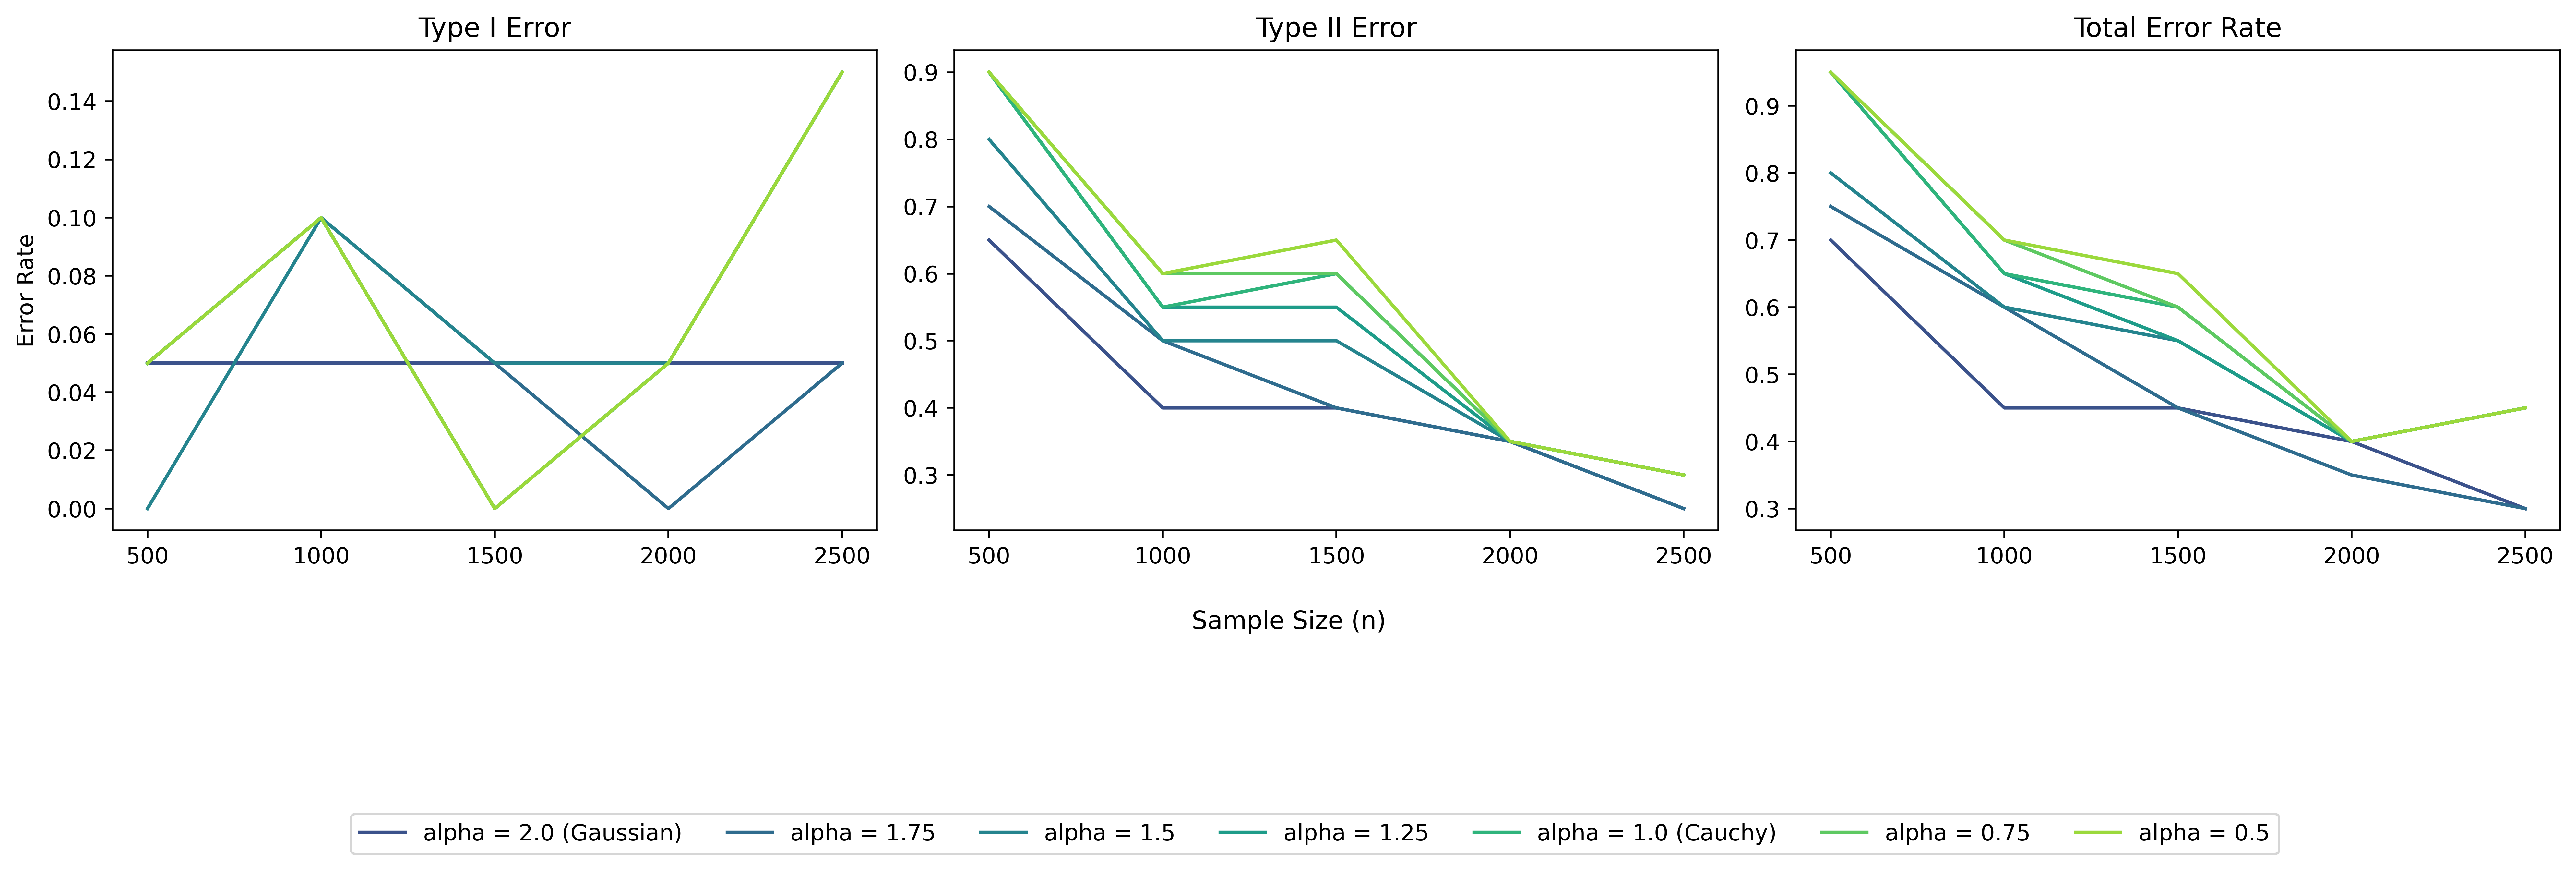

In [47]:
cit = kcit

results = ecit_simu_alpha(n_list=n_list, t=t, cit=cit, k=k, ensembles=ensembles)
show_results_k(results, ensembles_name, n_list)

In [ ]:
cit = cmiknn
results = ecit_simu_alpha(n_list=n_list, t=t, cit=cit, k=k, ensembles=ensembles)
show_results_k(results, ensembles_name, n_list)

In [ ]:
cit = nnscit
results = ecit_simu_alpha(n_list=n_list, t=t, cit=cit, k=k, ensembles=ensembles)
show_results_k(results, ensembles_name, n_list)